In [1]:
import pandas as pd
import seaborn as sns
from seaborn.linearmodels import corrplot
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
X_train_path = "/Users/thomasopsomer/data/plume-data/X_train.csv"
X_test_path = "/Users/thomasopsomer/data/plume-data/X_test.csv"
Y_train_path = "/Users/thomasopsomer/data/plume-data/Y_train.csv"

In [4]:
train_data = pd.read_csv(X_train_path)
Y_train = pd.read_csv(Y_train_path)
test_data = pd.read_csv(X_test_path)

## TRAINING SET:

In the Xtrain dataset, we are providing :

- **ID**: row ID of the dataset (from 0 to 448168)
- **daytime**: arbitrary value which describe the order in time, on an hourly basis, of the data
- **zone_id**: values range from 0 to 5 and describe a given city
- **station_id**: values are included in [ 16., 17., 20., 1., 18., 22., 26., 28., 6., 9., 25., 4., 10., 23., 5., 8., 11.]. A station is related to a given zone_id, several stations can be related to one city.
- **pollutant** name
- **is_calmday** (boolean): information on the type of day - basically discriminate week/wee-end days and public holidays

### Meteorological parameters:
- **temperature** (double)
- **windspeed** (double)
- **windbearing_cos** (double)
- **windbearing_sin** (double)
- **cloudcover** (double)
- **precipitations_intensity** (double)
- **precipitations_probability** (double)
- **pressure** (double)

### Static variables:

A buffer is a circle with a given diameter drawn around a position. As an example, HLRES_50 is the cumulated surface of High density residential land within a 50 m diameter circle. 

- **HLRES**: High density residential land (m2) - buffer of 50,100,300,500,1000 m 
- **HLDRES**: HLRES +Low density residential land (m2) - buffer of 50,100,300,500,1000 m
- **INDUSTRY**: Industry land (m2) - buffer of 1000 m
- **PORT**: Port land (m2) - buffer of 5000 m
- **NATURAL**: Semi-natural and forested land (m2) - buffer of 5000 m
- **GREEN**: urban parks and green areas + NATURAL (m2) - buffer of 5000 m
- **ROUTE**: cumulated road distances within the buffer (m) - buffer of 100, 300, 500, 1000 m
- **ROADINVDIST**: inverse of distance between the station and the nearest road (1/m)

In [61]:
print train_data.columns

Index([u'ID', u'hlres_50', u'green_5000', u'hldres_50', u'daytime',
       u'route_100', u'precipintensity', u'precipprobability', u'hlres_1000',
       u'temperature', u'is_calmday', u'route_1000', u'roadinvdist',
       u'port_5000', u'windbearingsin', u'cloudcover', u'hldres_100',
       u'natural_5000', u'hlres_300', u'hldres_300', u'route_300',
       u'station_id', u'pressure', u'route_500', u'hlres_500', u'hlres_100',
       u'pollutant', u'industry_1000', u'zone_id', u'windbearingcos',
       u'windspeed', u'hldres_500', u'hldres_1000'],
      dtype='object')


In [83]:
train_data

,ID,hlres_50,green_5000,hldres_50,daytime,route_100,precipintensity,precipprobability,hlres_1000,temperature,...,route_500,hlres_500,hlres_100,pollutant,industry_1000,zone_id,windbearingcos,windspeed,hldres_500,hldres_1000
0,0,NaN,5172542.5,3755.19043,72.0,NaN,0.6096,0.61,NaN,9.490000,...,NaN,NaN,NaN,NO2,NaN,0.0,0.809017,6.55,357436.1875,1.542650e+06
1,1,NaN,5172542.5,3755.19043,72.0,NaN,0.6096,0.61,NaN,9.490000,...,NaN,NaN,NaN,PM10,NaN,0.0,0.809017,6.55,357436.1875,1.542650e+06
2,2,NaN,5172542.5,3755.19043,73.0,NaN,0.0965,0.14,NaN,8.220000,...,NaN,NaN,NaN,NO2,NaN,0.0,0.997564,4.47,357436.1875,1.542650e+06
3,3,NaN,5172542.5,3755.19043,73.0,NaN,0.0965,0.14,NaN,8.220000,...,NaN,NaN,NaN,PM10,NaN,0.0,0.997564,4.47,357436.1875,1.542650e+06
4,4,NaN,5172542.5,3755.19043,74.0,NaN,0.0000,0.00,NaN,7.580000,...,NaN,NaN,NaN,NO2,NaN,0.0,0.994522,4.11,357436.1875,1.542650e+06
5,5,NaN,5172542.5,3755.19043,74.0,NaN,0.0000,0.00,NaN,7.580000,...,NaN,NaN,NaN,PM10,NaN,0.0,0.994522,4.11,357436.1875,1.542650e+06
6,6,NaN,5172542.5,3755.19043,75.0,NaN,0.0000,0.00,NaN,7.270000,...,NaN,NaN,NaN,NO2,NaN,0.0,0.939693,2.88,357436.1875,1.542650e+06
7,7,NaN,5172542.5,3755.19043,75.0,NaN,0.0000,0.00,NaN,7.270000,...,NaN,NaN,NaN,PM10,NaN,0.0,0.939693,2.88,357436.1875,1.542650e+06
8,8,NaN,5172542.5,3755.19043,76.0,NaN,0.0000,0.00,NaN,6.490000,...,NaN,NaN,NaN,NO2,NaN,0.0,0.920505,2.82,357436.1875,1.542650e+06
9,9,NaN,5172542.5,3755.19043,76.0,NaN,0.0000,0.00,NaN,6.490000,...,NaN,NaN,NaN,PM10,NaN,0.0,0.920505,2.82,357436.1875,1.542650e+06


In [162]:
#train_data.fillna(0)

In [47]:
train_data.groupby("daytime")[["ID"]].count()

,ID
daytime,
0.0,5
1.0,5
2.0,5
3.0,5
4.0,5
5.0,5
6.0,5
7.0,5
8.0,5


In [45]:
train_data.groupby(["zone_id"])[["ID"]].count()

,ID
zone_id,
0.0,84540
1.0,73984
2.0,81167
3.0,70159
4.0,69184
5.0,69135


In [46]:
train_data.groupby(["zone_id", "station_id"])[["ID"]].count()

ID
zone_id station_id       
0.0     16.0        28032
        17.0        28254
        20.0        28254
1.0     1.0         27694
        18.0        24454
        22.0        21836
2.0     26.0        40719
        28.0        40448
3.0     6.0         27832
        9.0         28218
        25.0        14109
4.0     4.0         27674
        10.0        27671
        23.0        13839
5.0     5.0         14090
        8.0         27302
        11.0        27743

In [48]:
train_data.groupby(["pollutant"])[["ID"]].count()

,ID
pollutant,
NO2,208478
PM10,188396
PM2_5,51295


In [54]:
train_data[["is_calmday"]].head()

,is_calmday
0,False
1,False
2,False
3,False
4,False


In [73]:
corr = train_data.corr()

In [246]:
train_data.query("pollutant == 'NO2' and station_id == 17.0 and zone_id == 0.0")

,ID,hlres_50,green_5000,hldres_50,daytime,route_100,precipintensity,precipprobability,hlres_1000,temperature,...,route_500,hlres_500,hlres_100,pollutant,industry_1000,zone_id,windbearingcos,windspeed,hldres_500,hldres_1000
28032,28032,NaN,2024935.625,7725.424805,72.0,NaN,0.60960,0.61,NaN,9.490000,...,NaN,NaN,NaN,NO2,NaN,0.0,0.809017,6.550,758783.8125,2344219.0
28034,28034,NaN,2024935.625,7725.424805,73.0,NaN,0.09650,0.14,NaN,8.220000,...,NaN,NaN,NaN,NO2,NaN,0.0,0.997564,4.470,758783.8125,2344219.0
28036,28036,NaN,2024935.625,7725.424805,74.0,NaN,0.00000,0.00,NaN,7.580000,...,NaN,NaN,NaN,NO2,NaN,0.0,0.994522,4.110,758783.8125,2344219.0
28038,28038,NaN,2024935.625,7725.424805,75.0,NaN,0.00000,0.00,NaN,7.270000,...,NaN,NaN,NaN,NO2,NaN,0.0,0.939693,2.880,758783.8125,2344219.0
28040,28040,NaN,2024935.625,7725.424805,76.0,NaN,0.00000,0.00,NaN,6.490000,...,NaN,NaN,NaN,NO2,NaN,0.0,0.920505,2.820,758783.8125,2344219.0
28042,28042,NaN,2024935.625,7725.424805,77.0,NaN,0.00000,0.00,NaN,6.490000,...,NaN,NaN,NaN,NO2,NaN,0.0,0.939693,2.700,758783.8125,2344219.0
28044,28044,NaN,2024935.625,7725.424805,78.0,NaN,0.00000,0.00,NaN,6.340000,...,NaN,NaN,NaN,NO2,NaN,0.0,0.848048,2.620,758783.8125,2344219.0
28046,28046,NaN,2024935.625,7725.424805,79.0,NaN,0.00000,0.00,NaN,6.340000,...,NaN,NaN,NaN,NO2,NaN,0.0,0.874620,2.990,758783.8125,2344219.0
28048,28048,NaN,2024935.625,7725.424805,80.0,NaN,0.00000,0.00,NaN,7.370000,...,NaN,NaN,NaN,NO2,NaN,0.0,0.978148,3.670,758783.8125,2344219.0
28050,28050,NaN,2024935.625,7725.424805,81.0,NaN,0.00000,0.00,NaN,8.160000,...,NaN,NaN,NaN,NO2,NaN,0.0,0.961262,4.170,758783.8125,2344219.0


In [274]:
pollutants = train_data.pollutant.unique()

zone_station = train_data.groupby(["zone_id", "station_id"]).groups.keys()

# make daytime to pollutant concentration for each (zone, station, pollutant)
D = {}
for zone, station in zone_station:
    for pollutant in pollutants:
        Y = Y_train[
            (train_data["pollutant"] == pollutant) &
            (train_data["zone_id"] == zone) &
            (train_data["station_id"] == station)].join(train_data["daytime"]) \
            .set_index("daytime") \
            .rename(columns={'TARGET': '%s-%s-%s' % (pollutant, int(zone), int(station))}) \
            .drop("ID", 1)
        D["%s-%s-%s" % (pollutant, int(zone), int(station))] = Y

{'NO2-0-16':            NO2-0-16
 daytime            
 72.0      43.000000
 73.0       9.000000
 74.0       6.000000
 75.0       7.000000
 76.0      14.000000
 77.0      31.000000
 78.0      50.000000
 79.0      58.000000
 80.0      61.000000
 81.0      36.000000
 82.0      26.000000
 83.0      23.000000
 84.0      24.000000
 85.0      24.000000
 86.0      23.000000
 87.0      24.000000
 88.0      29.000000
 89.0      58.000000
 90.0     101.000000
 91.0      68.000000
 92.0      55.000000
 93.0      56.000000
 94.0      59.000000
 95.0      62.000000
 96.0      65.000000
 97.0      61.000000
 98.0      57.000000
 99.0      45.000000
 100.0     37.000000
 101.0     53.000000
 ...             ...
 14227.0   51.000000
 14228.0   20.000000
 14229.0    9.000000
 14230.0    7.000000
 14231.0    3.000000
 14232.0    2.000000
 14233.0    9.092198
 14234.0    4.000000
 14235.0   11.000000
 14236.0    9.000000
 14237.0    8.000000
 14238.0    5.000000
 14239.0    6.000000
 14240.0    3.000000
 

In [277]:
result = pd.concat(D.values(), axis=1)
result

,PM2_5-1-1,PM10-0-20,NO2-0-16,NO2-0-17,PM2_5-3-9,PM2_5-0-20,PM2_5-4-4,PM10-4-4,NO2-5-8,PM2_5-5-8,...,NO2-4-23,PM10-4-10,PM10-1-1,PM10-3-6,PM2_5-2-28,PM10-5-11,NO2-5-11,PM2_5-1-18,PM10-5-8,PM2_5-2-26
daytime,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.000000,NaN,NaN,...,19.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,...,27.000000,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,...,35.000000,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,...,25.000000,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,...,22.000000,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.000000,NaN,NaN,...,25.000000,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,...,24.000000,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,...,17.000000,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,...,17.000000,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


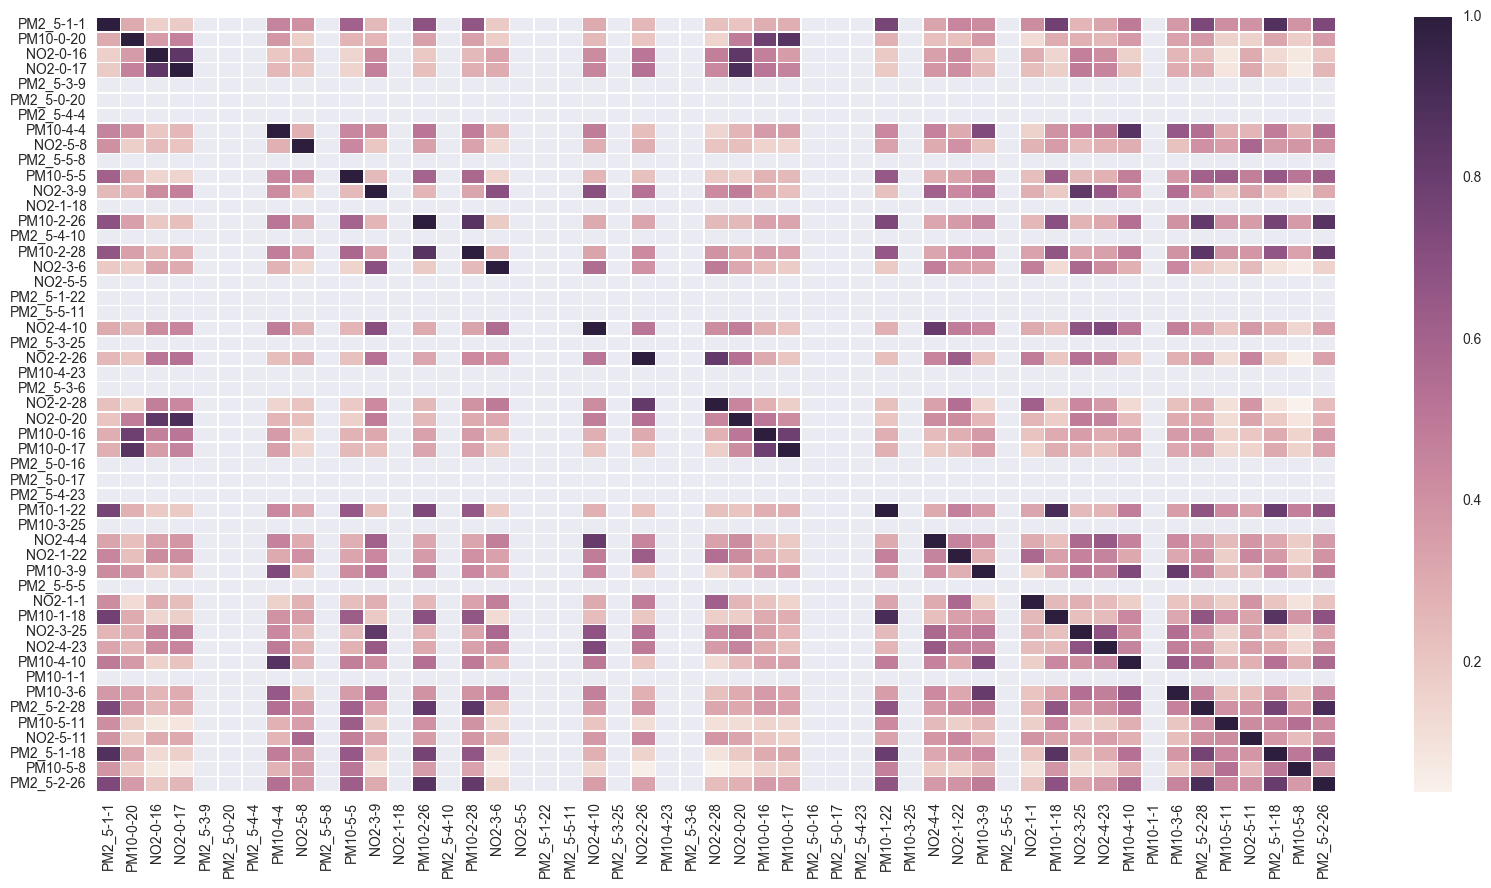

In [280]:
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(result.corr(), linewidths=.5, ax=ax)

In [214]:
Y_train[train_data["pollutant"] == "NO2"].shape

(208478, 2)

In [221]:
Y_train_NO2 = Y_train[train_data["pollutant"] == "NO2"].join(train_data["daytime"])
Y_train_NO2[Y_train_NO2["daytime"] == 142.0]

,ID,TARGET,daytime
140,140,2.666667,142.0
28172,28172,3.410526,142.0
56426,56426,3.918715,142.0
84680,84680,13.333333,142.0
136828,136828,6.697317,142.0
158734,158734,21.924831,142.0
199453,199453,28.666666,142.0
239827,239827,26.000000,142.0
267659,267659,12.720324,142.0
295809,295809,12.626229,142.0


In [ ]:
train_data

In [281]:
D.keys()

['PM2_5-1-1',
 'PM10-0-20',
 'NO2-0-16',
 'NO2-0-17',
 'PM2_5-3-9',
 'PM2_5-0-20',
 'PM2_5-4-4',
 'PM10-4-4',
 'NO2-5-8',
 'PM2_5-5-8',
 'PM10-5-5',
 'NO2-3-9',
 'NO2-1-18',
 'PM10-2-26',
 'PM2_5-4-10',
 'PM10-2-28',
 'NO2-3-6',
 'NO2-5-5',
 'PM2_5-1-22',
 'PM2_5-5-11',
 'NO2-4-10',
 'PM2_5-3-25',
 'NO2-2-26',
 'PM10-4-23',
 'PM2_5-3-6',
 'NO2-2-28',
 'NO2-0-20',
 'PM10-0-16',
 'PM10-0-17',
 'PM2_5-0-16',
 'PM2_5-0-17',
 'PM2_5-4-23',
 'PM10-1-22',
 'PM10-3-25',
 'NO2-4-4',
 'NO2-1-22',
 'PM10-3-9',
 'PM2_5-5-5',
 'NO2-1-1',
 'PM10-1-18',
 'NO2-3-25',
 'NO2-4-23',
 'PM10-4-10',
 'PM10-1-1',
 'PM10-3-6',
 'PM2_5-2-28',
 'PM10-5-11',
 'NO2-5-11',
 'PM2_5-1-18',
 'PM10-5-8',
 'PM2_5-2-26']

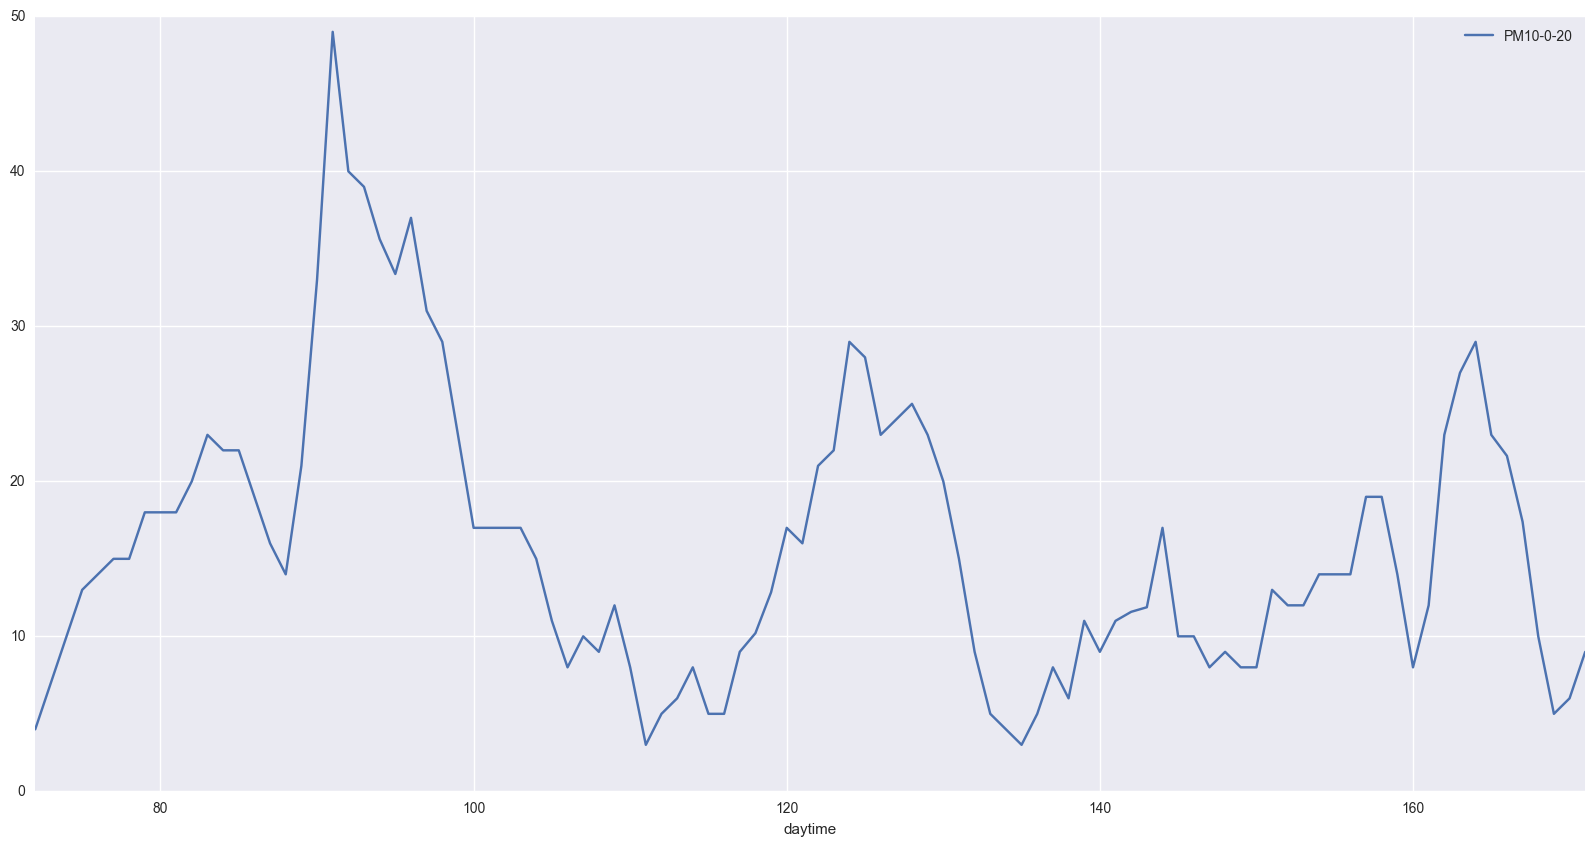

In [285]:
D["PM10-0-20"].head(100).plot(figsize=(20,10))

In [81]:
train_data_t = train_data.set_index("daytime")

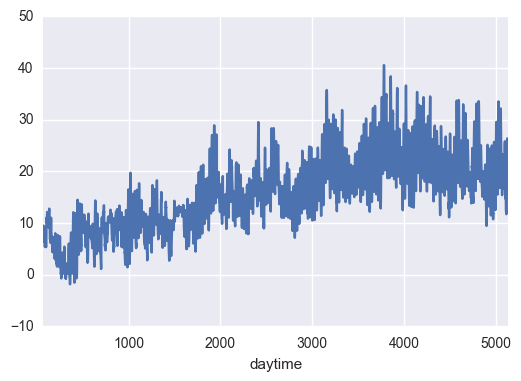

In [96]:
train_data_t["temperature"].head(10000).plot()

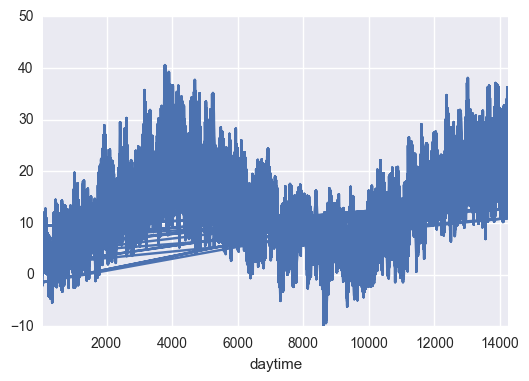

In [107]:
train_data["green_5000"].head(100)

0     5172542.5
1     5172542.5
2     5172542.5
3     5172542.5
4     5172542.5
5     5172542.5
6     5172542.5
7     5172542.5
8     5172542.5
9     5172542.5
10    5172542.5
11    5172542.5
12    5172542.5
13    5172542.5
14    5172542.5
15    5172542.5
16    5172542.5
17    5172542.5
18    5172542.5
19    5172542.5
20    5172542.5
21    5172542.5
22    5172542.5
23    5172542.5
24    5172542.5
25    5172542.5
26    5172542.5
27    5172542.5
28    5172542.5
29    5172542.5
        ...    
70    5172542.5
71    5172542.5
72    5172542.5
73    5172542.5
74    5172542.5
75    5172542.5
76    5172542.5
77    5172542.5
78    5172542.5
79    5172542.5
80    5172542.5
81    5172542.5
82    5172542.5
83    5172542.5
84    5172542.5
85    5172542.5
86    5172542.5
87    5172542.5
88    5172542.5
89    5172542.5
90    5172542.5
91    5172542.5
92    5172542.5
93    5172542.5
94    5172542.5
95    5172542.5
96    5172542.5
97    5172542.5
98    5172542.5
99    5172542.5
Name: green_5000, dtype:

In [ ]:
X_train["col_scaler"] = X_train["co"].apply(lambda x: Scaler.fit_transform(x))

In [12]:
test_data.columns

Index([u'ID', u'hlres_50', u'green_5000', u'hldres_50', u'daytime',
       u'route_100', u'precipintensity', u'precipprobability', u'hlres_1000',
       u'temperature', u'is_calmday', u'route_1000', u'roadinvdist',
       u'port_5000', u'windbearingsin', u'cloudcover', u'hldres_100',
       u'natural_5000', u'hlres_300', u'hldres_300', u'route_300',
       u'station_id', u'pressure', u'route_500', u'hlres_500', u'hlres_100',
       u'pollutant', u'industry_1000', u'zone_id', u'windbearingcos',
       u'windspeed', u'hldres_500', u'hldres_1000'],
      dtype='object')

In [30]:
train_data.groupby(["station_id", "hlres_50"]).count()

,,ID,green_5000,hldres_50,daytime,route_100,precipintensity,precipprobability,hlres_1000,temperature,is_calmday,...,route_500,hlres_500,hlres_100,pollutant,industry_1000,zone_id,windbearingcos,windspeed,hldres_500,hldres_1000
station_id,hlres_50,,,,,,,,,,,,,,,,,,,,,
4.0,7725.425293,27674,27674,27674,27674,0,27674,27674,27674,27674,27674,...,27674,27674,27674,27674,0,27674,27674,27674,27674,27674
10.0,7725.424805,27671,27671,27671,27671,0,27671,27671,27671,27671,27671,...,27671,27671,27671,27671,0,27671,27671,27671,27671,27671
23.0,2217.580322,13839,13839,13839,13839,0,13839,13839,13839,13839,13839,...,13839,13839,13839,13839,0,13839,13839,13839,13839,13839


In [36]:
train_data.groupby(["station_id","hlres_50","hldres_50"]).count()

,,,ID,green_5000,daytime,route_100,precipintensity,precipprobability,hlres_1000,temperature,is_calmday,route_1000,...,route_500,hlres_500,hlres_100,pollutant,industry_1000,zone_id,windbearingcos,windspeed,hldres_500,hldres_1000
station_id,hlres_50,hldres_50,,,,,,,,,,,,,,,,,,,,,
4.0,7725.425293,7725.425293,27674,27674,27674,0,27674,27674,27674,27674,27674,27674,...,27674,27674,27674,27674,0,27674,27674,27674,27674,27674
10.0,7725.424805,7725.424805,27671,27671,27671,0,27671,27671,27671,27671,27671,27671,...,27671,27671,27671,27671,0,27671,27671,27671,27671,27671
23.0,2217.580322,2217.580322,13839,13839,13839,0,13839,13839,13839,13839,13839,13839,...,13839,13839,13839,13839,0,13839,13839,13839,13839,13839


In [42]:
train_data["zone_id"].unique().tolist()

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

In [43]:
train_data["block"] = "aa"

In [46]:
train_data[["block"]]

,block
0,aa
1,aa
2,aa
3,aa
4,aa
5,aa
6,aa
7,aa
8,aa
9,aa


In [61]:
train_data[train_data["pollutant"].apply(lambda x: x in ["NO2"])]
#zone_station

,ID,hlres_50,green_5000,hldres_50,daytime,route_100,precipintensity,precipprobability,hlres_1000,temperature,...,hlres_500,hlres_100,pollutant,industry_1000,zone_id,windbearingcos,windspeed,hldres_500,hldres_1000,block
0,0,NaN,5172542.5,3755.19043,72.0,NaN,0.6096,0.61,NaN,9.490000,...,NaN,NaN,NO2,NaN,0.0,0.809017,6.550,357436.1875,1.542650e+06,aa
2,2,NaN,5172542.5,3755.19043,73.0,NaN,0.0965,0.14,NaN,8.220000,...,NaN,NaN,NO2,NaN,0.0,0.997564,4.470,357436.1875,1.542650e+06,aa
4,4,NaN,5172542.5,3755.19043,74.0,NaN,0.0000,0.00,NaN,7.580000,...,NaN,NaN,NO2,NaN,0.0,0.994522,4.110,357436.1875,1.542650e+06,aa
6,6,NaN,5172542.5,3755.19043,75.0,NaN,0.0000,0.00,NaN,7.270000,...,NaN,NaN,NO2,NaN,0.0,0.939693,2.880,357436.1875,1.542650e+06,aa
8,8,NaN,5172542.5,3755.19043,76.0,NaN,0.0000,0.00,NaN,6.490000,...,NaN,NaN,NO2,NaN,0.0,0.920505,2.820,357436.1875,1.542650e+06,aa
10,10,NaN,5172542.5,3755.19043,77.0,NaN,0.0000,0.00,NaN,6.490000,...,NaN,NaN,NO2,NaN,0.0,0.939693,2.700,357436.1875,1.542650e+06,aa
12,12,NaN,5172542.5,3755.19043,78.0,NaN,0.0000,0.00,NaN,6.340000,...,NaN,NaN,NO2,NaN,0.0,0.848048,2.620,357436.1875,1.542650e+06,aa
14,14,NaN,5172542.5,3755.19043,79.0,NaN,0.0000,0.00,NaN,6.340000,...,NaN,NaN,NO2,NaN,0.0,0.874620,2.990,357436.1875,1.542650e+06,aa
16,16,NaN,5172542.5,3755.19043,80.0,NaN,0.0000,0.00,NaN,7.370000,...,NaN,NaN,NO2,NaN,0.0,0.978148,3.670,357436.1875,1.542650e+06,aa
18,18,NaN,5172542.5,3755.19043,81.0,NaN,0.0000,0.00,NaN,8.160000,...,NaN,NaN,NO2,NaN,0.0,0.961262,4.170,357436.1875,1.542650e+06,aa
